In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
file_one = "data_input/Revenue Chart_Full Data_data.csv"
file_two = "data_input/Mac sales - Sheet1.csv"
file_three = "data_input/Mac sales - iphone.csv"
file_four = "data_input/Mac sales - Radio.csv"
file_five = "data_input/Mac sales - Apple.csv"
file_six = "data_input/Cell speed.csv"

In [3]:
file_one_df = pd.read_csv(file_one)
mac_sale_df = pd.read_csv(file_two)
iphone_sale_df = pd.read_csv(file_three)
radio_df = pd.read_csv(file_four)
apple_df = pd.read_csv(file_five)
cell_speed_df = pd.read_csv(file_six)

In [4]:
file_one_df.head()

,Year of Year Date,Adjusted for Inflation Notes,Adjusted for Inflation Title,Format,Metric,Year,Value (For Charting),Adjusted for Inflation Flag,Year Date,Format Value # (Billion),Format Value # (Million),Total Value # (Billion),Total Value # (Million),Total Value For Year,Value (Actual),Year (copy)
0,1985,NaN,NaN,CD,Value,1985,389.5,NaN,1985,NaN,$389.5M,$4.4B,NaN,$4362.5B,389.5,1985
1,1986,NaN,NaN,CD,Value,1986,930.1,NaN,1986,NaN,$930.1M,$4.6B,NaN,$4640.7B,930.1,1986
2,1987,NaN,NaN,CD,Value,1987,1593.6,NaN,1987,$1.6B,NaN,$5.6B,NaN,$5564.0B,1593.6,1987
3,1988,NaN,NaN,CD,Value,1988,2089.9,NaN,1988,$2.1B,NaN,$6.3B,NaN,$6254.7B,2089.9,1988
4,1989,NaN,NaN,CD,Value,1989,2587.7,NaN,1989,$2.6B,NaN,$6.6B,NaN,$6580.2B,2587.7,1989


In [5]:
music_df = file_one_df[['Year','Format','Value (For Charting)']]
music_df = music_df.rename(columns={'Value (For Charting)':'Revenue in Millions'})
music_df               

,Year,Format,Revenue in Millions
0,1985,CD,389.500000
1,1986,CD,930.100000
2,1987,CD,1593.600000
3,1988,CD,2089.900000
4,1989,CD,2587.700000
...,...,...,...
434,2018,Vinyl Single,5.720601
435,2019,Vinyl Single,6.728344
436,2020,Vinyl Single,6.317220
437,2021,Vinyl Single,7.898734


In [6]:
crop_music_df = music_df.loc[music_df['Year'] >= 2004] 
crop_music_df

,Year,Format,Revenue in Millions
19,2004,CD,11446.500000
20,2005,CD,10520.200000
21,2006,CD,9372.600000
22,2007,CD,7452.300000
23,2008,CD,5471.300000
...,...,...,...
434,2018,Vinyl Single,5.720601
435,2019,Vinyl Single,6.728344
436,2020,Vinyl Single,6.317220
437,2021,Vinyl Single,7.898734


## Creating a DataFrame organized by Year and Format

In [7]:
total_rev = pd.DataFrame({'Year':crop_music_df['Year'].unique(),'Total Revenue':crop_music_df.groupby(['Year']).sum()['Revenue in Millions']})
total_rev = total_rev[['Total Revenue']].reset_index()
cd_rev = crop_music_df.loc[crop_music_df['Format'] == 'CD'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'CD Revenue'})
cd_single_rev = crop_music_df.loc[crop_music_df['Format'] == 'CD Single'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'CD Single Revenue'})
cassette_rev = crop_music_df.loc[crop_music_df['Format'] == 'Cassette'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Cassette Revenue'})
cassette_single_rev = crop_music_df.loc[crop_music_df['Format'] == 'Cassette Single'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Cassette Single Revenue'})
dvd_audio_rev = crop_music_df.loc[crop_music_df['Format'] == 'DVD Audio'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'DVD Audio Revenue'})
download_album_rev = crop_music_df.loc[crop_music_df['Format'] == 'Download Album'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Download Album Revenue'})
download_music_vid_rev = crop_music_df.loc[crop_music_df['Format'] == 'Download Music Video'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Download Music Video Revenue'})
download_single_rev = crop_music_df.loc[crop_music_df['Format'] == 'Download Single'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Download Single Revenue'})
kiosk_rev = crop_music_df.loc[crop_music_df['Format'] == 'Kiosk'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Kiosk Revenue'})
lp_ep_rev = crop_music_df.loc[crop_music_df['Format'] == 'LP/EP'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'LP/EP Revenue'})
limited_sub_rev = crop_music_df.loc[crop_music_df['Format'] == 'Limited Tier Paid Subscription'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Limited Tier Paid Subscription Revenue'})
music_vid_physical_rev = crop_music_df.loc[crop_music_df['Format'] == 'Music Video (Physical)'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Music Video (Physical) Revenue'})
on_demand_streaming_rev = crop_music_df.loc[crop_music_df['Format'] == 'On-Demand Streaming (Ad-Supported)'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'On-Demand Streaming (Ad-Supported) Revenue'})
other_streaming_rev = crop_music_df.loc[crop_music_df['Format'] == 'Other Ad-Supported Streaming'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Other Ad-Supported Streaming Revenue'})
other_digital_rev = crop_music_df.loc[crop_music_df['Format'] == 'Other Digital'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Other Digital Revenue'})
paid_sub_rev = crop_music_df.loc[crop_music_df['Format'] == 'Paid Subscription'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Paid Subscription Revenue'})
ringtone_ringback_rev = crop_music_df.loc[crop_music_df['Format'] == 'Ringtones & Ringbacks'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Ringtones & Ringbacks Revenue'})
sacd_rev = crop_music_df.loc[crop_music_df['Format'] == 'SACD'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'SACD Revenue'})
soundexchange_rev = crop_music_df.loc[crop_music_df['Format'] == 'SoundExchange Distributions'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'SoundExchange Distributions Revenue'})
sync_rev = crop_music_df.loc[crop_music_df['Format'] == 'Synchronization'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Synchronization Revenue'})
vinyl_single_rev = crop_music_df.loc[crop_music_df['Format'] == 'Vinyl Single'][['Year','Revenue in Millions']].rename(columns = {'Revenue in Millions':'Vinyl Single Revenue'})
dfs = [cd_single_rev,cassette_rev,cassette_single_rev,dvd_audio_rev,download_album_rev,
                     download_music_vid_rev,download_single_rev,kiosk_rev,lp_ep_rev,limited_sub_rev,
                     music_vid_physical_rev,on_demand_streaming_rev,other_streaming_rev,other_digital_rev,
                     paid_sub_rev,ringtone_ringback_rev,sacd_rev,soundexchange_rev,sync_rev,vinyl_single_rev,total_rev]

format_df = cd_rev
for df in dfs:
    format_df = pd.merge(format_df,df,how = 'left')

format_df = format_df.fillna(0)
format_df

,Year,CD Revenue,CD Single Revenue,Cassette Revenue,Cassette Single Revenue,DVD Audio Revenue,Download Album Revenue,Download Music Video Revenue,Download Single Revenue,Kiosk Revenue,...,On-Demand Streaming (Ad-Supported) Revenue,Other Ad-Supported Streaming Revenue,Other Digital Revenue,Paid Subscription Revenue,Ringtones & Ringbacks Revenue,SACD Revenue,SoundExchange Distributions Revenue,Synchronization Revenue,Vinyl Single Revenue,Total Revenue
0,2004,11446.500000,15.000000,23.7,0.0,6.500000,45.500000,0.000000,138.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16.600000,6.9,0.000000,19.900000,12345.100000
1,2005,10520.200000,10.900000,13.1,0.0,11.200000,135.700000,3.700000,363.300000,1.000000,...,0.000000,0.000000,0.000000,149.200000,421.600000,10.000000,20.4,0.000000,13.200000,12289.900000
2,2006,9372.600000,7.700000,3.7,0.0,2.400000,275.900000,19.700000,580.600000,1.900000,...,0.000000,0.000000,0.000000,206.200000,773.800000,5.500000,32.8,0.000000,9.900000,11759.500000
3,2007,7452.300000,12.200000,3.0,0.0,2.800000,497.400000,28.200000,811.000000,2.600000,...,0.000000,0.000000,0.000000,234.000000,1055.800000,3.600000,36.2,0.000000,4.000000,10650.900000
4,2008,5471.300000,3.500000,0.9,0.0,1.200000,635.300000,41.300000,1032.200000,2.600000,...,0.000000,0.000000,0.000000,221.400000,977.100000,3.100000,100.0,0.000000,2.900000,8776.800000
5,2009,4318.800000,3.100000,0.0,0.0,1.600000,744.300000,40.900000,1172.000000,6.300000,...,0.000000,0.000000,0.000000,206.200000,702.800000,2.400000,155.5,201.200000,2.500000,7831.000000
6,2010,3389.400000,2.900000,0.0,0.0,0.900000,872.400000,36.600000,1336.400000,6.400000,...,0.000000,0.000000,0.000000,212.400000,448.000000,1.700000,249.2,188.700000,2.300000,7013.800000
7,2011,3100.700000,3.500000,0.0,0.0,0.300000,1070.800000,32.400000,1522.400000,2.700000,...,113.800000,0.000000,0.000000,247.800000,276.200000,1.500000,292.0,196.500000,4.600000,7135.600000
8,2012,2485.614699,3.225093,0.0,0.0,0.183107,1204.822243,20.842242,1644.570645,3.654065,...,170.935408,0.000000,0.000000,399.882531,145.992935,1.342500,462.0,190.597753,4.743056,7015.742990
9,2013,2140.917718,2.445737,0.0,0.0,0.000000,1232.139716,16.740803,1573.420534,6.183604,...,220.873544,0.000000,0.000000,643.324289,97.999612,0.978383,590.4,189.679434,2.978937,7035.104501


In [9]:
format_df.to_csv("data_input/music_revenue.csv", index=False, header=True)

## Seperating Physical and Digital Revenue

In [10]:
physical_revs = [cd_rev,cd_single_rev,cassette_rev,cassette_single_rev,
                 dvd_audio_rev,lp_ep_rev,music_vid_physical_rev,sacd_rev,
                 vinyl_single_rev]
digital_revs = [download_album_rev,download_music_vid_rev,download_single_rev,
                kiosk_rev,limited_sub_rev,on_demand_streaming_rev,
                other_streaming_rev,other_digital_rev,paid_sub_rev,
                ringtone_ringback_rev,soundexchange_rev,sync_rev]

In [11]:
physical_df = physical_revs.pop(0)
for df in physical_revs:
    physical_df = pd.merge(physical_df,df,how = 'left')
digital_df = digital_revs.pop(0)
for df in digital_revs:
    digital_df = pd.merge(digital_df,df,how = 'left')    

In [12]:
physical_df = physical_df.fillna(0)

In [13]:
digital_df = digital_df.fillna(0)

In [14]:
physical_df['Total Physical Revenue'] = physical_df['CD Revenue']+physical_df['CD Single Revenue']+physical_df['Cassette Revenue']+physical_df['Cassette Single Revenue']+physical_df['DVD Audio Revenue']+physical_df['LP/EP Revenue']+physical_df['Music Video (Physical) Revenue']+physical_df['SACD Revenue']+physical_df['Vinyl Single Revenue']
physical_df

,Year,CD Revenue,CD Single Revenue,Cassette Revenue,Cassette Single Revenue,DVD Audio Revenue,LP/EP Revenue,Music Video (Physical) Revenue,SACD Revenue,Vinyl Single Revenue,Total Physical Revenue
0,2004,11446.500000,15.000000,23.7,0.0,6.500000,19.300000,607.200000,16.600000,19.900000,12154.700000
1,2005,10520.200000,10.900000,13.1,0.0,11.200000,14.200000,602.200000,10.000000,13.200000,11195.000000
2,2006,9372.600000,7.700000,3.7,0.0,2.400000,15.700000,451.100000,5.500000,9.900000,9868.600000
3,2007,7452.300000,12.200000,3.0,0.0,2.800000,22.900000,484.900000,3.600000,4.000000,7985.700000
4,2008,5471.300000,3.500000,0.9,0.0,1.200000,56.700000,227.300000,3.100000,2.900000,5766.900000
5,2009,4318.800000,3.100000,0.0,0.0,1.600000,63.800000,209.600000,2.400000,2.500000,4601.800000
6,2010,3389.400000,2.900000,0.0,0.0,0.900000,88.900000,177.600000,1.700000,2.300000,3663.700000
7,2011,3100.700000,3.500000,0.0,0.0,0.300000,119.400000,151.000000,1.500000,4.600000,3381.000000
8,2012,2485.614699,3.225093,0.0,0.0,0.183107,160.723058,116.613655,1.342500,4.743056,2772.445168
9,2013,2140.917718,2.445737,0.0,0.0,0.000000,210.739051,106.283138,0.978383,2.978937,2464.342964


In [15]:
digital_df['Total Digital Revenue'] = digital_df['Download Album Revenue'] +digital_df['Download Music Video Revenue'] +digital_df['Download Single Revenue'] +digital_df['Kiosk Revenue'] +digital_df['Limited Tier Paid Subscription Revenue'] +digital_df['On-Demand Streaming (Ad-Supported) Revenue'] +digital_df['Other Ad-Supported Streaming Revenue'] +digital_df['Other Digital Revenue'] +digital_df['Paid Subscription Revenue']+digital_df['Ringtones & Ringbacks Revenue'] +digital_df['SoundExchange Distributions Revenue']+digital_df['Synchronization Revenue']  
digital_df

,Year,Download Album Revenue,Download Music Video Revenue,Download Single Revenue,Kiosk Revenue,Limited Tier Paid Subscription Revenue,On-Demand Streaming (Ad-Supported) Revenue,Other Ad-Supported Streaming Revenue,Other Digital Revenue,Paid Subscription Revenue,Ringtones & Ringbacks Revenue,SoundExchange Distributions Revenue,Synchronization Revenue,Total Digital Revenue
0,2004,45.500000,0.000000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.9,0.000000,190.400000
1,2005,135.700000,3.700000,363.300000,1.000000,0.000000,0.000000,0.000000,0.000000,149.200000,421.600000,20.4,0.000000,1094.900000
2,2006,275.900000,19.700000,580.600000,1.900000,0.000000,0.000000,0.000000,0.000000,206.200000,773.800000,32.8,0.000000,1890.900000
3,2007,497.400000,28.200000,811.000000,2.600000,0.000000,0.000000,0.000000,0.000000,234.000000,1055.800000,36.2,0.000000,2665.200000
4,2008,635.300000,41.300000,1032.200000,2.600000,0.000000,0.000000,0.000000,0.000000,221.400000,977.100000,100.0,0.000000,3009.900000
5,2009,744.300000,40.900000,1172.000000,6.300000,0.000000,0.000000,0.000000,0.000000,206.200000,702.800000,155.5,201.200000,3229.200000
6,2010,872.400000,36.600000,1336.400000,6.400000,0.000000,0.000000,0.000000,0.000000,212.400000,448.000000,249.2,188.700000,3350.100000
7,2011,1070.800000,32.400000,1522.400000,2.700000,0.000000,113.800000,0.000000,0.000000,247.800000,276.200000,292.0,196.500000,3754.600000
8,2012,1204.822243,20.842242,1644.570645,3.654065,0.000000,170.935408,0.000000,0.000000,399.882531,145.992935,462.0,190.597753,4243.297822
9,2013,1232.139716,16.740803,1573.420534,6.183604,0.000000,220.873544,0.000000,0.000000,643.324289,97.999612,590.4,189.679434,4570.761537


## Apple Revenue

In [16]:
apple_sales = [0,0]
for row in apple_df.iterrows():
    apple_sale = row[1]['Revenue ($bn)']*1000
    apple_sales.append(apple_sale)

df = pd.DataFrame({'Year': digital_df['Year'].unique(),
                   'Total Physical Revenue': physical_df['Total Physical Revenue'],
                   'Total Digital Revenue':digital_df['Total Digital Revenue'],
                   'Apple Revenue':apple_sales})
df

,Year,Total Physical Revenue,Total Digital Revenue,Apple Revenue
0,2004,12154.700000,190.400000,0.0
1,2005,11195.000000,1094.900000,0.0
2,2006,9868.600000,1890.900000,19100.0
3,2007,7985.700000,2665.200000,24400.0
4,2008,5766.900000,3009.900000,37400.0
5,2009,4601.800000,3229.200000,42700.0
6,2010,3663.700000,3350.100000,65000.0
7,2011,3381.000000,3754.600000,108000.0
8,2012,2772.445168,4243.297822,156300.0
9,2013,2464.342964,4570.761537,170800.0


The correlation bewteen Apple revenue and Digital revenue is: 0.9287843514158857


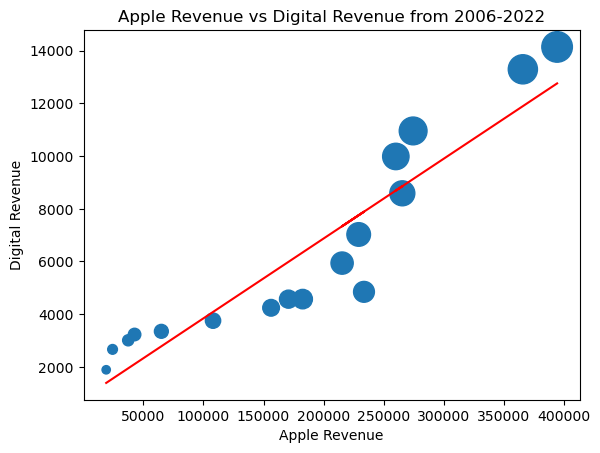

In [18]:
plt.scatter(df.loc[df['Year'] >= 2006]['Apple Revenue'],df.loc[df['Year'] >= 2006]['Total Digital Revenue'],s = (df.loc[df['Year'] >= 2006]['Year']-2000)**2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(df.loc[df['Year'] >= 2006]['Apple Revenue'], df.loc[df['Year'] >= 2006]['Total Digital Revenue'])
regress_values = df.loc[df['Year'] >= 2006]['Apple Revenue'] * slope + intercept

plt.plot(df.loc[df['Year'] >= 2006]['Apple Revenue'],regress_values,"r-")
print(f"The correlation bewteen Apple revenue and Digital revenue is: {rvalue}")
plt.xlabel('Apple Revenue')
plt.ylabel('Digital Revenue')
plt.title('Apple Revenue vs Digital Revenue from 2006-2022')
plt.savefig('graph_output/Apple_vs_digital_revenue.png', bbox_inches="tight")
plt.show()

The correlation bewteen Apple revenue and Physical revenue is: -0.8347778217190442


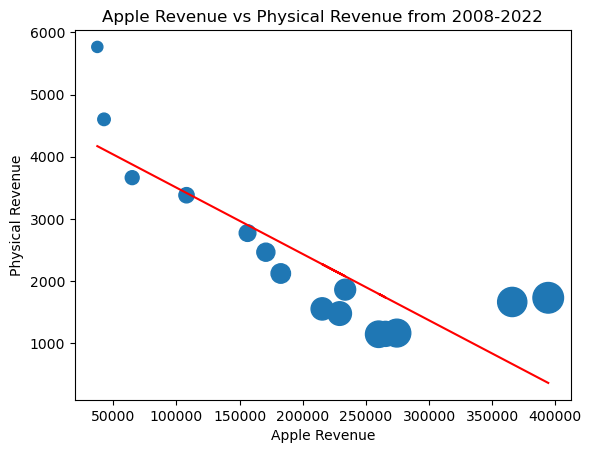

In [26]:
plt.scatter(df.loc[df['Year'] >= 2008]['Apple Revenue'],
            df.loc[df['Year'] >= 2008]['Total Physical Revenue'],
            s = (df.loc[df['Year'] >= 2008]['Year']-2000)**2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(df.loc[df['Year'] >= 2008]['Apple Revenue'],
                                                        df.loc[df['Year'] >= 2008]['Total Physical Revenue'])
regress_values = df.loc[df['Year'] >= 2008]['Apple Revenue'] * slope + intercept

plt.plot(df.loc[df['Year'] >= 2008]['Apple Revenue'],regress_values,"r-")
print(f"The correlation bewteen Apple revenue and Physical revenue is: {rvalue}")
plt.xlabel('Apple Revenue')
plt.ylabel('Physical Revenue')
plt.title('Apple Revenue vs Physical Revenue from 2008-2022')
plt.savefig('graph_output/Apple_vs_physical_revenue.png', bbox_inches="tight")
plt.show()

## % Radio Listeners in America

In [20]:
radio_df['% of Americans that listen to the Radio'] = radio_df['Listen to terrestrial radio'].str.replace('%', '')
radio_lists = []
for row in radio_df.iterrows():
    radio_list = int(row[1]['% of Americans that listen to the Radio'])
    radio_lists.append(radio_list)
radio_df['% Radio Listeners']= radio_lists
radio_df['% Radio Listeners']

0     92
1     92
2     93
3     92
4     92
5     91
6     91
7     91
8     90
9     89
10    89
11    83
12    84
13    82
Name: % Radio Listeners, dtype: int64

The correlation bewteen Digital Music Revenue and % Radio Listeners is: -0.945821499068528


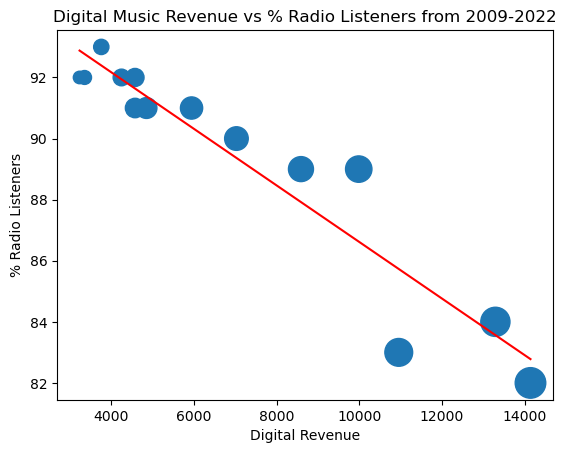

In [27]:
plt.scatter(df.loc[df['Year'] >= 2009]['Total Digital Revenue'],
            radio_df['% Radio Listeners'],
            s = (df.loc[df['Year'] >= 2009]['Year']-2000)**2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(df.loc[df['Year'] >= 2009]['Total Digital Revenue'],
                                                        radio_df['% Radio Listeners'])
regress_values = df.loc[df['Year'] >= 2009]['Total Digital Revenue'] * slope + intercept

plt.plot(df.loc[df['Year'] >= 2009]['Total Digital Revenue'],regress_values,"r-")
print(f"The correlation bewteen Digital Music Revenue and % Radio Listeners is: {rvalue}")
plt.xlabel('Digital Revenue')
plt.ylabel('% Radio Listeners')
plt.title('Digital Music Revenue vs % Radio Listeners from 2009-2022')
plt.savefig('graph_output/radio_vs_digital_revenue.png', bbox_inches="tight")
plt.show()

The correlation bewteen Physical Music Revenue and % Radio Listeners is: 0.5611354871435076


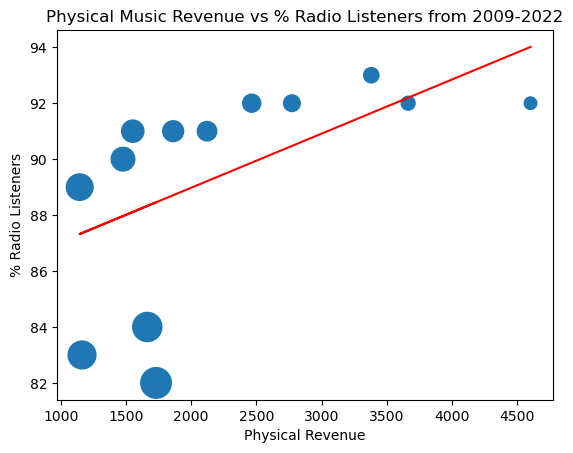

In [28]:
plt.scatter(df.loc[df['Year'] >= 2009]['Total Physical Revenue'],
            radio_df['% Radio Listeners'],
            s = (df.loc[df['Year'] >= 2009]['Year']-2000)**2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(df.loc[df['Year'] >= 2009]['Total Physical Revenue'],
                                                        radio_df['% Radio Listeners'])
regress_values = df.loc[df['Year'] >= 2009]['Total Physical Revenue'] * slope + intercept

plt.plot(df.loc[df['Year'] >= 2009]['Total Physical Revenue'],regress_values,"r-")
print(f"The correlation bewteen Physical Music Revenue and % Radio Listeners is: {rvalue}")
plt.xlabel('Physical Revenue')
plt.ylabel('% Radio Listeners')
plt.title('Physical Music Revenue vs % Radio Listeners from 2009-2022')
plt.savefig('graph_output/radio_vs_physical_revenue.png', bbox_inches="tight")
plt.show()

In [23]:
radios = [0,0,0,0,0]
for row in radio_df.iterrows():
    radio = row[1]['% Radio Listeners']
    radios.append(radio)
radios
final_df = pd.DataFrame({'Year': digital_df['Year'].unique(),
                   'Total Physical Revenue': physical_df['Total Physical Revenue'],
                   'Total Digital Revenue':digital_df['Total Digital Revenue'],
                   'Apple Revenue':apple_sales, '% Radio Listeners': radios})
final_df

,Year,Total Physical Revenue,Total Digital Revenue,Apple Revenue,% Radio Listeners
0,2004,12154.700000,190.400000,0.0,0
1,2005,11195.000000,1094.900000,0.0,0
2,2006,9868.600000,1890.900000,19100.0,0
3,2007,7985.700000,2665.200000,24400.0,0
4,2008,5766.900000,3009.900000,37400.0,0
5,2009,4601.800000,3229.200000,42700.0,92
6,2010,3663.700000,3350.100000,65000.0,92
7,2011,3381.000000,3754.600000,108000.0,93
8,2012,2772.445168,4243.297822,156300.0,92
9,2013,2464.342964,4570.761537,170800.0,92


In [24]:
final_df.to_csv("data_input/Physical_vs_Digital_revenue.csv", index=False, header=True)

## Music Revenue. When Digital surpassed Physical

<function matplotlib.pyplot.show(close=None, block=None)>

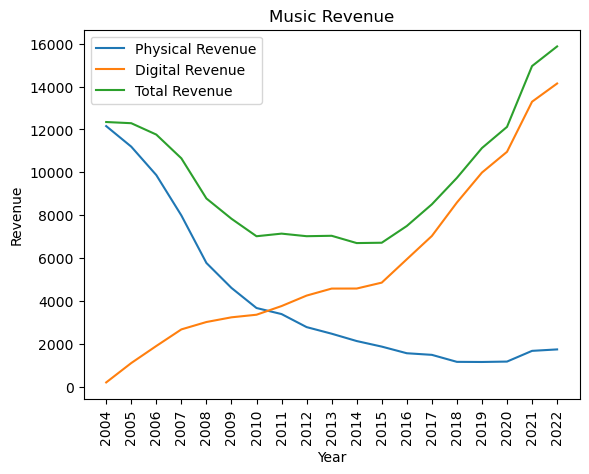

In [25]:
plt.plot(physical_df['Year'], physical_df['Total Physical Revenue'],label = 'Physical Revenue')
plt.plot(digital_df['Year'], digital_df['Total Digital Revenue'],label = 'Digital Revenue')
plt.plot(format_df['Year'],format_df['Total Revenue'],label = 'Total Revenue')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Music Revenue')
plt.xticks(digital_df['Year'],rotation = 90)
plt.savefig('graph_output/total_music_revenue.png', bbox_inches="tight")
plt.show